In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def getExtents(a,b,numRows,numCols):
    r1 = int(0)
    c1 = int(a*r1+b) # (r1,c1) is 1st point
    r2 = int(numRows-1)
    c2 = int(a*r2+b) # (r2,c2) is last point
    return (c1,r1),(c2,r2)

## Hough Transformation

Line

In [3]:
def HoughLines(I):
    angles = np.deg2rad(np.arange(360))
    numRows , numCols = I.shape[0] , I.shape[1]
    dMax = int((numRows**2 + numCols**2)**0.5)
    H = np.zeros((dMax,len(angles)))
    idx = np.argwhere(I)
    r , c = idx[:,0] , idx[:,1]
    for i in range(len(r)):
        for ang in angles:
            ri,ci = r[i] , c[i]
            di = int(ri*np.cos(ang) + ci*np.sin(ang))
            if di > 0 and di < dMax:
                H[di,int(np.rad2deg(ang))] += 1
    return H

In [4]:
E = cv2.imread(r'E.png',cv2.IMREAD_GRAYSCALE)

In [5]:
E.min(),E.max(),E.dtype

(0, 255, dtype('uint8'))

(-0.5, 1152.5, 498.5, -0.5)

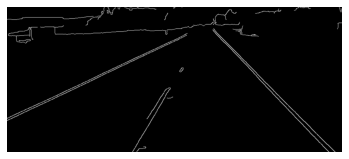

In [6]:
plt.imshow(E,cmap='gray')
plt.axis('off')

In [7]:
E = E>100

In [8]:
E.shape,E.dtype

((499, 1153), dtype('bool'))

In [9]:
H = HoughLines(E)

In [15]:
idx = np.argwhere(H==H.max())
idx

array([[346,  25]], dtype=int64)

In [16]:
best_d,best_theta = idx[0,0] , idx[0,1]
best_d,best_theta

(346, 25)

convert from polar representation back to graph

In [17]:
theta = np.deg2rad(best_theta)
a = -(1/np.tan(theta))
b = best_d/np.sin(theta)

In [18]:
a,b

(-2.1445069205095586, 818.7057477707644)

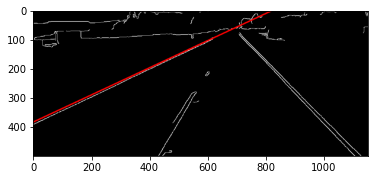

In [19]:
s,e = getExtents(a,b,E.shape[0],E.shape[1])
E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
E3 = np.array(255*E,dtype = np.uint8)
E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
I = cv2.line(E2,s,e,(0,0,255),3)
plt.imshow(I[:,:,::-1])

Circle

In [20]:
def HoughCircles(E):
    numRows , numCols = E.shape[0] , E.shape[1]
    dMax = int((numRows**2 + numCols**2)**0.5)
    H = np.zeros((numRows,numCols,dMax))
    idx = np.argwhere(E)
    r , c = idx[:,0] , idx[:,1]
    for i in range(len(r)):
        for a in range(numRows):
            for b in range(numCols):
                ri,ci = r[i] , c[i]
                di = int(((ri-a)**2 + (ci-b)**2)**0.5)
                if di > 0 and di < dMax:
                    H[a,b,di] += 1
    return H

In [30]:
img = cv2.imread(r'Ec.png',cv2.IMREAD_GRAYSCALE)

(-0.5, 149.5, 137.5, -0.5)

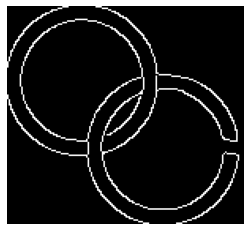

In [31]:
plt.imshow(img,cmap='gray')
plt.axis('off')

In [32]:
img = img>100

In [24]:
H = HoughCircles(img)

In [26]:
idx = np.argwhere(H==H.max())
best_cr,best_cc,best_d = idx[0,0] , idx[0,1], idx[0,2]

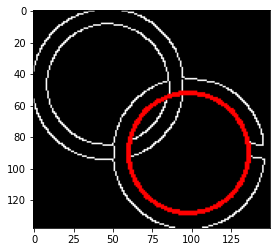

In [27]:
E2 = np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)
E3 = np.array(255*img,dtype = np.uint8)
E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
I = cv2.circle(E2,(int(best_cc),int(best_cr)),int(best_d),(0,0,255),2)
plt.imshow(I[:,:,::-1])